In [7]:
import numpy as np
import cv2
import glob
from cv2_plt_imshow import cv2_plt_imshow
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image

In [40]:
def loadData(path,img,dim):
    for file in glob.glob(path):
        im = cv2.imread(file,0)
        im = cv2.resize(im,(dim,dim))
        img.append((im))
    return img

def prepareInput(path,dim):
    data = []
    data = loadData(path,data,dim)
    newData = np.array(data).reshape(np.array(data).shape[0],-1)
    return np.array(data),newData

def findTopK(k,eigvals,eigvecs):
    return eigvecs[:,:k],eigvals[:k]

def getNoComponent(eigVal,threshold):
    varRatio = eigVal/np.sum(eigVal)
    s = 0
    i = -1
    while s<threshold and s<1.0:
        i+=1
        s+=varRatio[i]
    print("Top ",i,"eigenvector(s) selected:")
    return 950

In [9]:
def plotFaces(image,title,n):
    fig = plt.figure(figsize=(15,10))
    plt.title(title, fontsize = "25")
    cols=10
    rows=5
    plt.tight_layout()
    for i in range(n):
        plt.axis('off')
        fig.add_subplot(rows,cols,i+1).sharey
        plt.imshow(image[i],cmap='gray')
        plt.axis('off')
        plt.title(i+1)  

In [10]:
def eigenDecomposing(data,typ,dim):
    #newData = data.reshape(data.shape[0],-1)
    Mean = np.mean(data,axis=0)
    Mean_2 = np.copy(Mean)
    print(Mean_2.shape)
    print(Mean.shape)
    
    Mean_2[Mean == 0] = 1
    subtracted_Mean = (data-Mean_2)/Mean_2
    print(subtracted_Mean.shape)
    Covariance = (np.dot(subtracted_Mean,subtracted_Mean.T))
    plt.title("Mean Face")
    plt.axis('off')
    print("Covariance shape = ",Covariance.shape)
    
    if typ=='dict':
        Mean2 = np.array(Mean.reshape(data[1][0].shape[0],data[1][0].shape[1]),dtype = np.uint64)
    else:
        Mean2 = np.array(Mean.reshape(dim,dim),dtype = np.uint64)
    
    plt.imshow(Mean2,cmap='gray')
    plt.show()
    
    return Mean,subtracted_Mean,Covariance

In [11]:
def FindFaceSpace(Covariance,subtracted_Mean,xDim,yDim):
    w,v = np.linalg.eig(Covariance)
    sorted_index = np.argsort(w)[::-1] # reveresly sorted index
    eigvals = w[sorted_index]
    eigvecs = v[:,sorted_index]
    print(eigvecs.shape)

    K = getNoComponent(eigvals,0.9)
    Vecs,Vals = findTopK(K,eigvals,eigvecs)
    print("Vecs shape",Vecs.shape)
    print("Subtracted Mean shape",subtracted_Mean.shape)
    image = np.dot(subtracted_Mean.T,Vecs)
    facespace = image.reshape(xDim,yDim,K).T
    
    print(facespace.shape)
    for i in range(facespace.shape[0]):
        facespace[i] = facespace[i].T
    return facespace,image.T

In [12]:
dim=128
path_rand = r"Random_Faces/*.*"
random_faces,new_rf = prepareInput(path_rand,dim)
print(random_faces.shape)
print(new_rf.shape)
#plotFaces(random_faces,"First 50 training examples - Flickr Dataset\n")

(1000, 128, 128)
(1000, 16384)


(16384,)
(16384,)
(1000, 16384)
Covariance shape =  (1000, 1000)


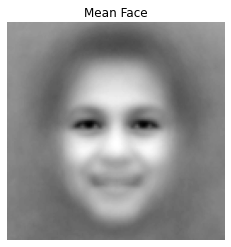

(1000, 1000)
Top  123 eigenvector(s) selected:
Vecs shape (1000, 950)
Subtracted Mean shape (1000, 16384)
(950, 128, 128)


In [41]:
xDim = random_faces.shape[1]
yDim = random_faces.shape[2]
Mean,subtracted_Mean,Covariance = eigenDecomposing(new_rf,'list',dim)

FaceSpace,Images = FindFaceSpace(Covariance,subtracted_Mean,xDim,yDim)

In [42]:
#plt.imshow(FaceSpace[0])
I = FaceSpace.reshape(FaceSpace.shape[0],-1)
#FaceSpace.reshape(dim,dim)

#np.dot(Images.T,)
#FaceSpace.shape
#Weights_Faces = np.dot(subtracted_Mean,np.dot(Images,np.linalg.inv(np.dot(Images.T,Images))))
#plt.imshow(Images[0],cmap='gray')

In [43]:
print(subtracted_Mean.shape)
Weight_Faces = subtracted_Mean@(I.T@(np.linalg.inv((I@I.T))))
print(I.shape)

(1000, 16384)
(950, 16384)


(1000, 950)
(950, 16384)


(-0.5, 127.5, 127.5, -0.5)

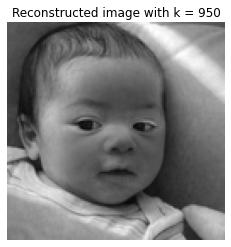

In [44]:
#W = np.linalg.norm(Weight_Faces.T,axis=1)
##print(type(W[0]))
#plt.plot(W,'o')
print(Weight_Faces.shape)
print(I.shape)
WW = (Weight_Faces@I)
plt.imshow(WW[0].reshape(dim,dim),cmap='gray')
plt.title("Reconstructed image with k = "+(str)(I.shape[0]))
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

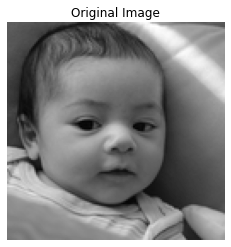

In [45]:
plt.imshow(random_faces[0],cmap='gray')
plt.title("Original Image")
plt.axis("off")

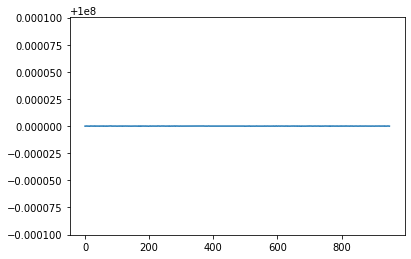